<a href="https://colab.research.google.com/github/georginagrillo/Trabajo-final/blob/main/ProyectoParteII%2BGrillo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alumna: Georgina Grillo
# Ejercicio Final de Data Science: Predicción de Autos con caja de cambios automática.


Objetivo: Construir un modelo de Machine Learning para predecir si un auto tiene o no una caja de cambio automática basándose en un conjunto de atributos del vehículo. Utilizaremos un RandomForestClassifier.

Elegí este dataset de Kaggle por la cantidad de información númerica que contiene. Se llama "Car details v4".
Este dsataset tiene información de autos usados.
Podría haberlo usado para predecir el "precio" pero me pareció desafiante agregar una columna binaria con el dato "si tiene caja de cambios automáticas" colocar 1 "si no tiene caja de cambios automática colocar" 0 para poder aplicar los siguientes modelos.

Me sirvió mucho el ejemplo de la última clase y lo utilicé como base para realizar los códigos de mi dataset.

Con este Dataset podré ver en principio un resumen de la información, y luego algunos gráficos que respondan a las siguientes preguntas:

1) El tamaño de los autos está relacionado con el tipo de caja de cambios?

2) El peso de los autos está relacionado con el tipo de caja de cambios?

3) Es verdad que los autos con caja automática aparecieron luego del año 2000?

4) Son más caros los autos con caja automática?

5) Los autos con caja automática tienen mayor capacidad de litros en el tanque de nafta?


**Entrega II - Pasos:**

1. Introducción y Objetivo: Definir el problema y el objetivo.
2. Importar Librerías: Cargar las herramientas necesarias.
3. Carga de Datos: Leer el dataset.
4. Graficos para conocer el datastet.
5. Hipótesis: Plantear una hipótesis clara.
6. Análisis Exploratorio de Datos (EDA): Entender los datos, distribuciones, valores faltantes y relaciones.
7. Feature Engineering (Ingeniería de Características): Crear nuevas características si es relevante.
8. Preprocesamiento de Datos: Preparar los datos para el modelo (manejo de categóricas, escalado).
9. División de Datos: Separar en conjuntos de entrenamiento y prueba.
10. Construcción y Entrenamiento del Modelo: Usar RandomForestClassifier.
11. Evaluación del Modelo: Medir el rendimiento con métricas adecuadas.
12. Análisis de Importancia de Características: Identificar qué variables son más influyentes.
13. Conclusiones: Interpretar los resultados y validar/refutar la hipótesis.



## 1. Introducción y Objetivo
Objetivo: El objetivo es predecir la presencia (1) o ausencia (0) de caja de cambios automática.

## 2. Importar Librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from google.colab import drive
drive.mount ('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Configuraciones para visualización
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

## 3. Carga de Datos

Url: https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho/data

In [ ]:
df = pd.read_csv ('/content/drive/MyDrive/CODERHOUSE/car details v4.csv')

In [ ]:
df.dtypes

,0
Make,object
Model,object
Price,int64
Year,int64
Kilometer,int64
Fuel Type,object
Transmission,object
Location,object
Color,object
Owner,object


In [ ]:
df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [ ]:
df.describe()

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,2.059000e+03,2059.000000,2.059000e+03,1995.000000,1995.000000,1995.000000,1995.000000,1946.000000
mean,1.702992e+06,2016.425449,5.422471e+04,4280.860652,1767.991980,1591.735338,5.306266,52.002210
std,2.419881e+06,3.363564,5.736172e+04,442.458507,135.265825,136.073956,0.822170,15.110198
min,4.900000e+04,1988.000000,0.000000e+00,3099.000000,1475.000000,1165.000000,2.000000,15.000000
25%,4.849990e+05,2014.000000,2.900000e+04,3985.000000,1695.000000,1485.000000,5.000000,41.250000
50%,8.250000e+05,2017.000000,5.000000e+04,4370.000000,1770.000000,1545.000000,5.000000,50.000000
75%,1.925000e+06,2019.000000,7.200000e+04,4629.000000,1831.500000,1675.000000,5.000000,60.000000
max,3.500000e+07,2022.000000,2.000000e+06,5569.000000,2220.000000,1995.000000,8.000000,105.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [ ]:
# Creo una nueva columna binaria para la columna transmission
df['Es_automatico'] = (df['Transmission'] == 'Automatic').astype(int)

In [ ]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

## 4. Graficos para conocer el datastet

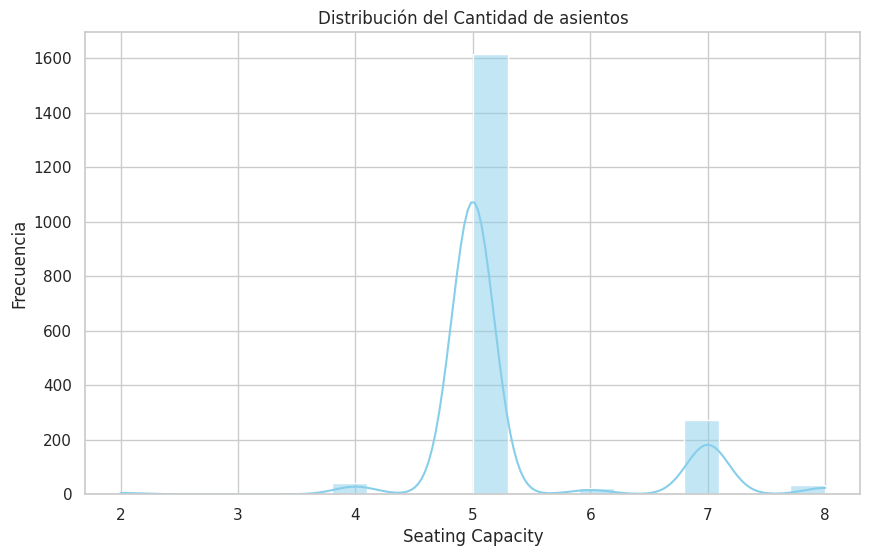

In [ ]:
# Distribución de la cantidad de asientps
plt.figure(figsize=(10, 6))
sns.histplot(df['Seating Capacity'], bins=20, kde=True, color='skyblue')
plt.title('Distribución del Cantidad de asientos')
plt.xlabel('Seating Capacity')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

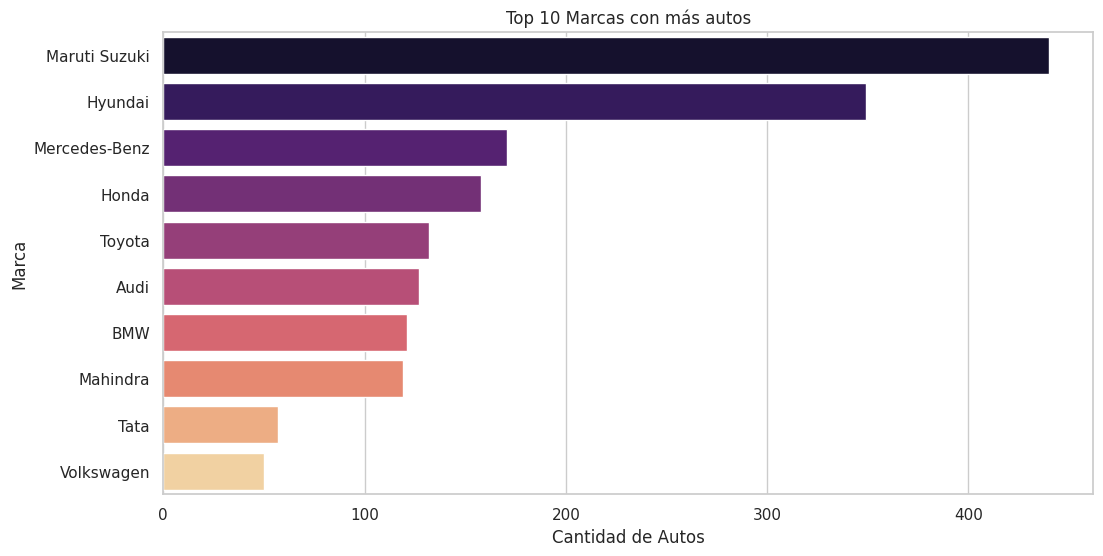

In [ ]:
# Top 10 Marcas por cantidad de Autos
top_Make = df['Make'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_Make.values, y=top_Make.index, palette='magma', hue=top_Make.index)
plt.title('Top 10 Marcas con más autos')
plt.xlabel('Cantidad de Autos')
plt.ylabel('Marca')
plt.show()

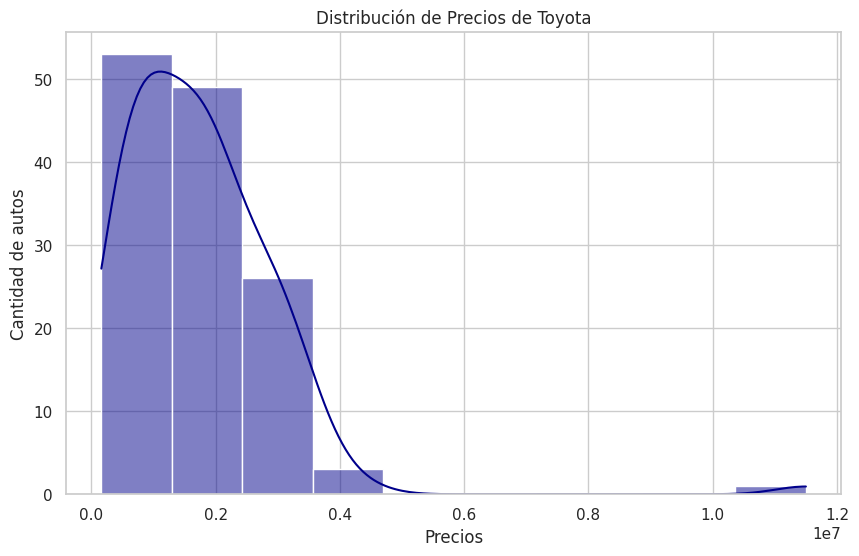

In [ ]:
# Filtrar Precios y cantidad de Autos de una Marca específico Ej: Toyota
Toyota_Autos = df[df['Make'] == 'Toyota']
plt.figure(figsize=(10, 6))
sns.histplot(Toyota_Autos['Price'], bins=10, kde=True, color='darkblue')
plt.title('Distribución de Precios de Toyota')
plt.xlabel('Precios')
plt.ylabel('Cantidad de autos')
plt.show()

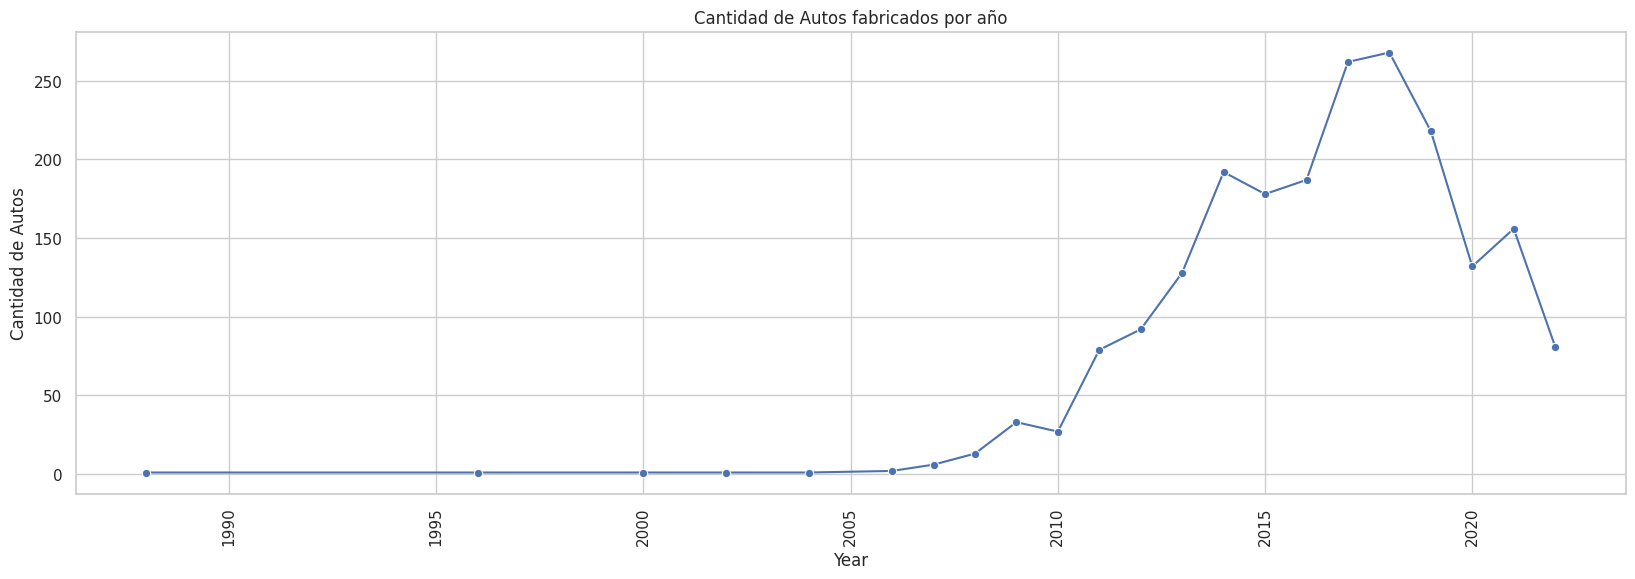

In [ ]:
# Cantidad de autos por año
plt.figure(figsize=(20, 6))
pelisxano = df['Year'].value_counts().sort_index()
sns.lineplot(x=pelisxano.index, y=pelisxano.values, marker='o')
plt.title('Cantidad de Autos fabricados por año')
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.ylabel('Cantidad de Autos')
plt.grid(True)
plt.show()

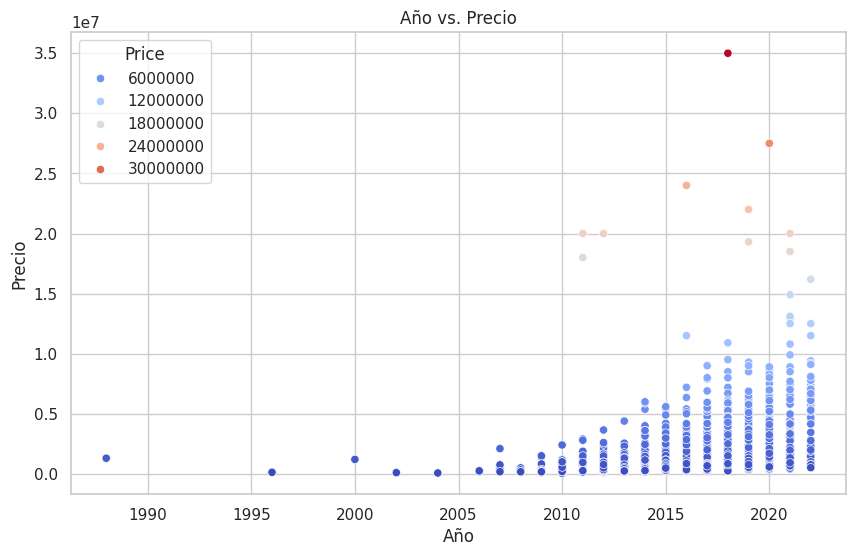

In [ ]:
# Año vs. Precio
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Year', y='Price', hue='Price', palette='coolwarm')
plt.title('Año vs. Precio')
plt.xlabel('Año')
plt.ylabel('Precio')
plt.show()

## 5. Hipótesis

### **Hipótesis Nula (H0)**: Las características de los vehículos disponibles (Año, Peso, Ancho, Alto, etc.) no son suficientes para predecir la presencia de caja automática con precisión significativamente mejor que el azar.


### **Hipótesis Alternativa (H1)**: Es posible construir un modelo de clasificación (Random Forest) utilizando las características del vehículo que prediga la presencia de caja de cambios automática con una precisión y AUC (Area Under Curve) significativamente superiores al 50% (azar). Esperamos alcanzar una precisión > 70%.

## 6. Análisis Exploratorio de Datos (EDA)


### 6.1. Revisar valores faltantes

In [ ]:
missing_values = df.isnull().sum()

In [ ]:
missing_values

,0
Make,0
Model,0
Price,0
Year,0
Kilometer,0
Fuel Type,0
Transmission,0
Location,0
Color,0
Owner,0


### 6.2. Conversión de columnas y agregado de columnas binarias

In [ ]:
cols_a_convertir = ['Seating Capacity', 'Fuel Tank Capacity', 'Length', 'Width', 'Height', 'Year' , 'Price']

for col in cols_a_convertir:
    df[col] = df[col].fillna(0).astype(int)

In [ ]:
# Ver todas las columnas numéricas
num_cols = df.select_dtypes(include=['int64', 'float64'])

# Filtrar solo las que tienen muchos valores únicos (para evitar las discretas o binarias)
continuous_cols = [col for col in num_cols.columns if df[col].nunique() > 10]

print(continuous_cols)

['Price', 'Year', 'Kilometer', 'Length', 'Width', 'Height', 'Fuel Tank Capacity']


In [ ]:
df['Es_automatico'].unique()

array([0, 1])

In [ ]:
df['Price_decil'] = pd.qcut(df['Price'], q=10)  # 10 grupos
df['Kilometer_cuartil'] = pd.qcut(df['Kilometer'], q=4)  # 4 cuartiles
df['Length_cuartil'] = pd.qcut(df['Length'], q=4)  # 4 cuartiles
df['Width_cuartil'] = pd.qcut(df['Width'], q=4)  # 4 cuartiles
df['Height_cuartil'] = pd.qcut(df['Height'], q=4)  # 4 cuartiles
df['Fuel Tank Capacity_cuartil'] = pd.qcut(df['Fuel Tank Capacity'], q=4)  # 4 cuartiles

### 6.3. Distribución de la variable objetivo ('Es_automatico')

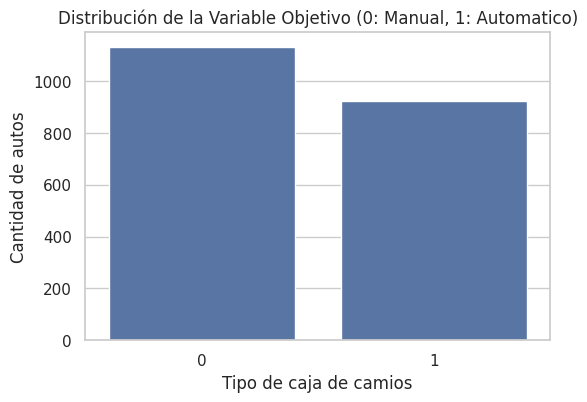

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Es_automatico', data=df)
plt.title('Distribución de la Variable Objetivo (0: Manual, 1: Automatico)')
plt.xlabel('Tipo de caja de camios')
plt.ylabel('Cantidad de autos')
target_dist = df['Es_automatico'].value_counts(normalize=True) * 100

plt.show()

### 6.4. Análisis de variables numéricas

In [ ]:
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
numerical_features

['Price',
 'Year',
 'Kilometer',
 'Length',
 'Width',
 'Height',
 'Seating Capacity',
 'Fuel Tank Capacity',
 'Es_automatico']

In [ ]:
# Variables categóricas codificadas numéricamente: 'Precio_decil', 'Year', 'Kilometer', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity', 'Es_automatico'
categorical_coded_num = ['Price_decil' , 'Year', 'Kilometer_cuartil', 'Length_cuartil', 'Width_cuartil', 'Height_cuartil', 'Seating Capacity', 'Fuel Tank Capacity', 'Es_automatico']

In [ ]:
numerical_continuous = [col for col in numerical_features if col not in categorical_coded_num]

In [ ]:
numerical_continuous

['Price', 'Kilometer', 'Length', 'Width', 'Height']

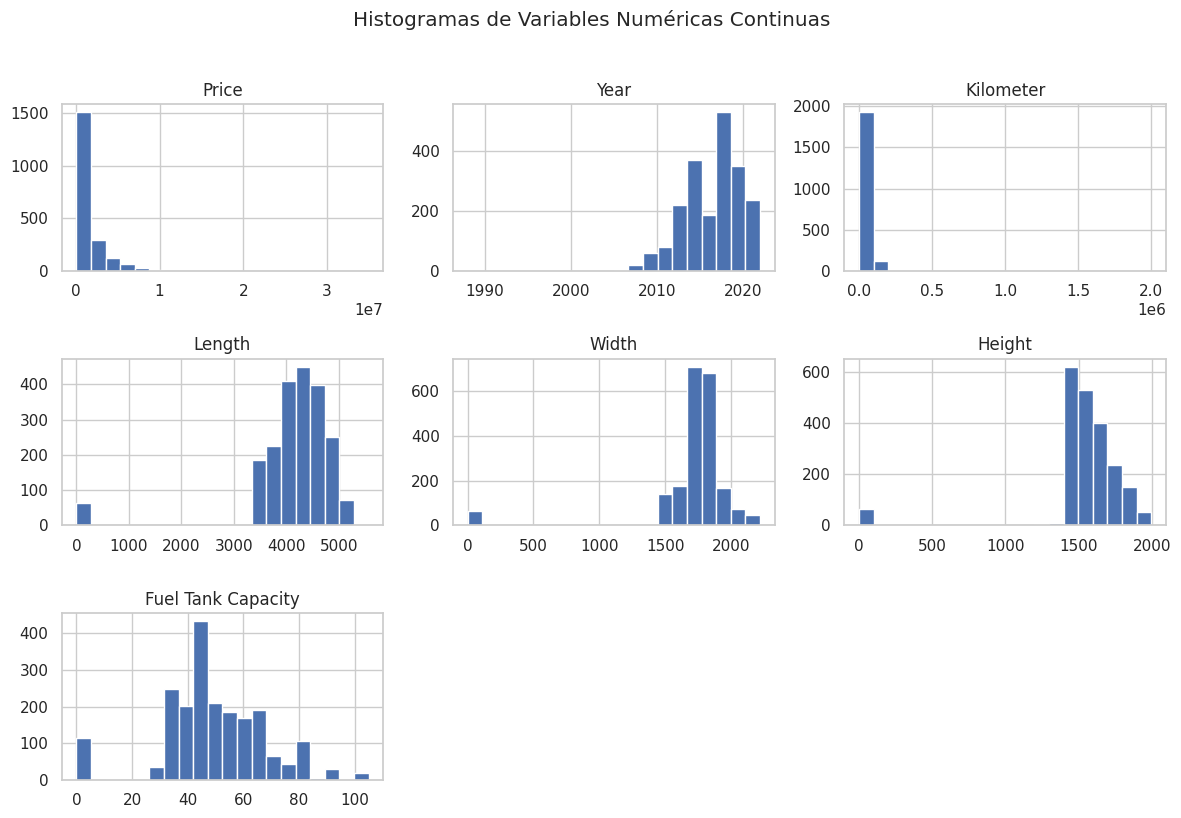

In [ ]:
# Histogramas para variables continuas
df[continuous_cols].hist(figsize=(12, 8), bins=20)
plt.suptitle('Histogramas de Variables Numéricas Continuas', y=1.02)
plt.tight_layout()
plt.show()


Boxplots de Variables Numéricas Continuas vs Transmission:


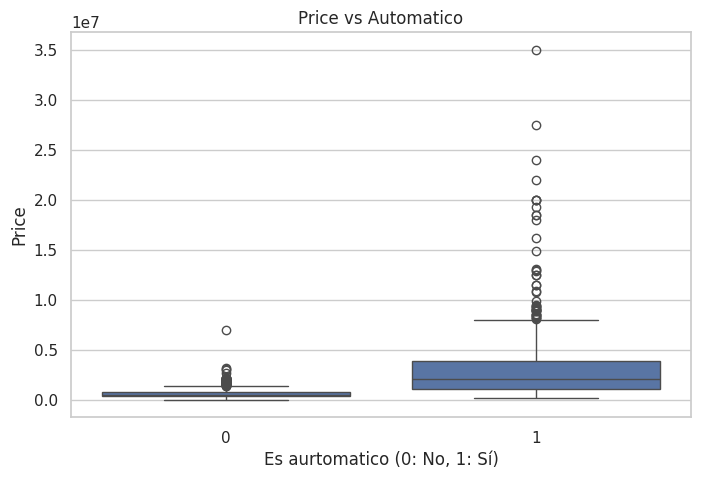

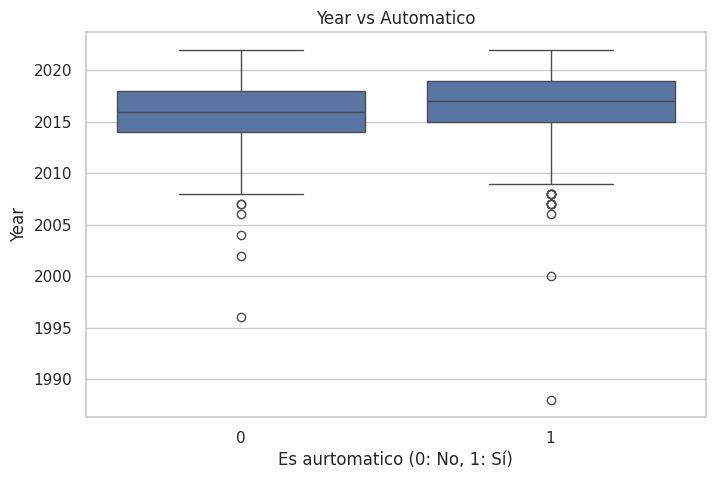

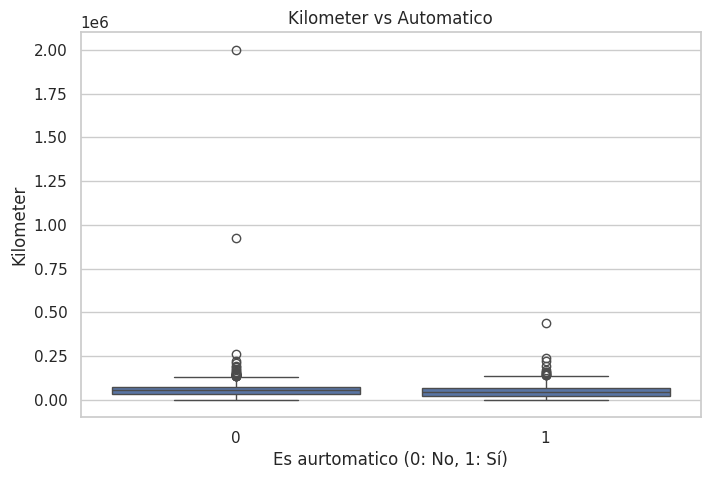

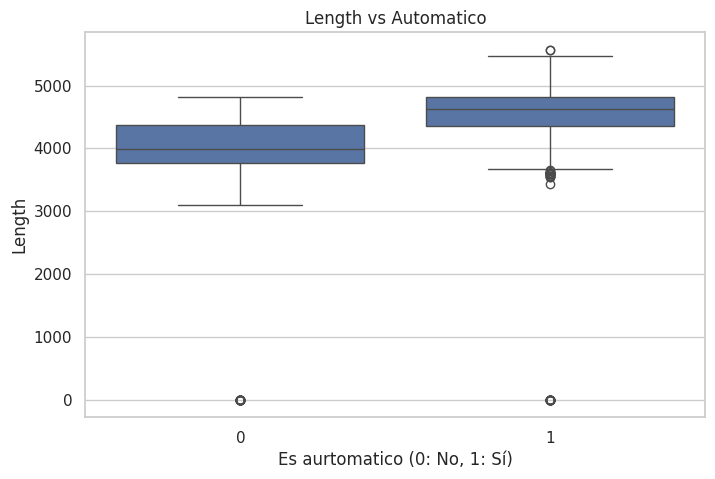

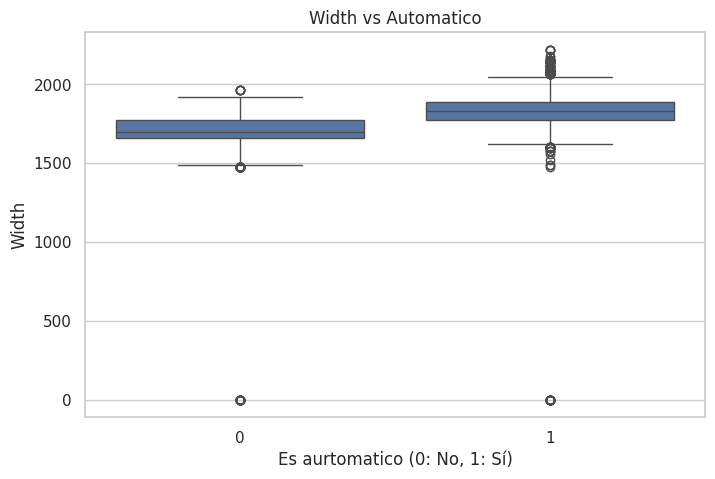

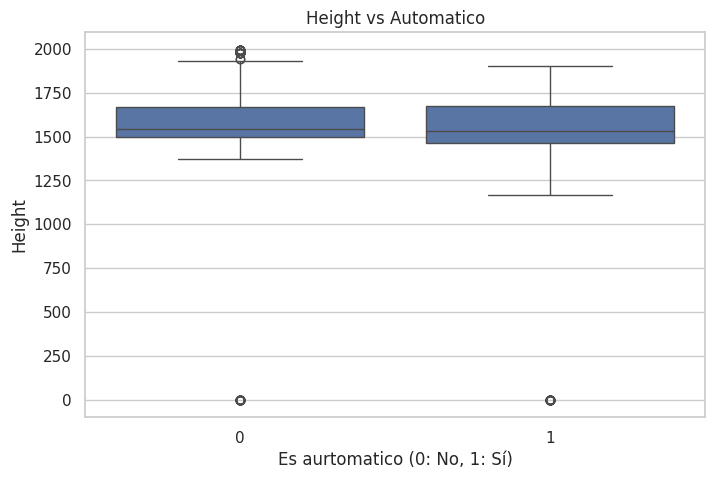

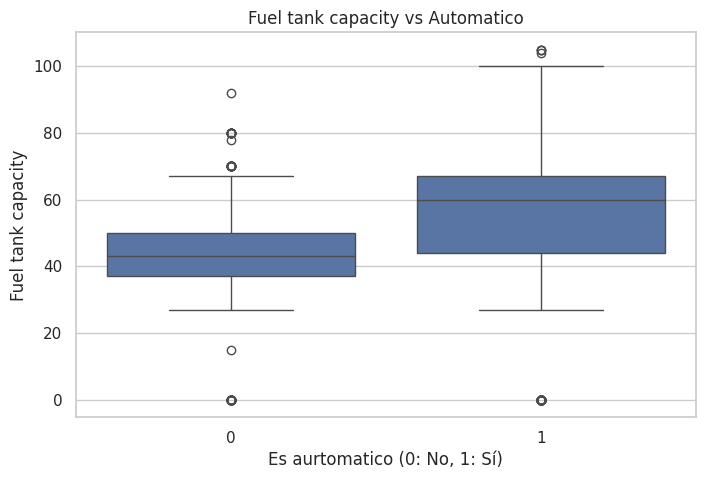

In [ ]:
# Boxplots para variables continuas vs Transmission
print("\nBoxplots de Variables Numéricas Continuas vs Transmission:")
for col in continuous_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Es_automatico', y=col, data=df)
    plt.title(f'{col.capitalize()} vs Automatico')
    plt.xlabel('Es aurtomatico (0: No, 1: Sí)')
    plt.ylabel(col.capitalize())
    plt.show()

### 6.5. Análisis de variables categóricas (incluyendo las codificadas numéricamente)

In [ ]:
categorical_features = ['Price_decil', 'Year', 'Kilometer_cuartil', 'Length_cuartil', 'Width_cuartil', 'Height_cuartil', 'Seating Capacity', 'Fuel Tank Capacity_cuartil']

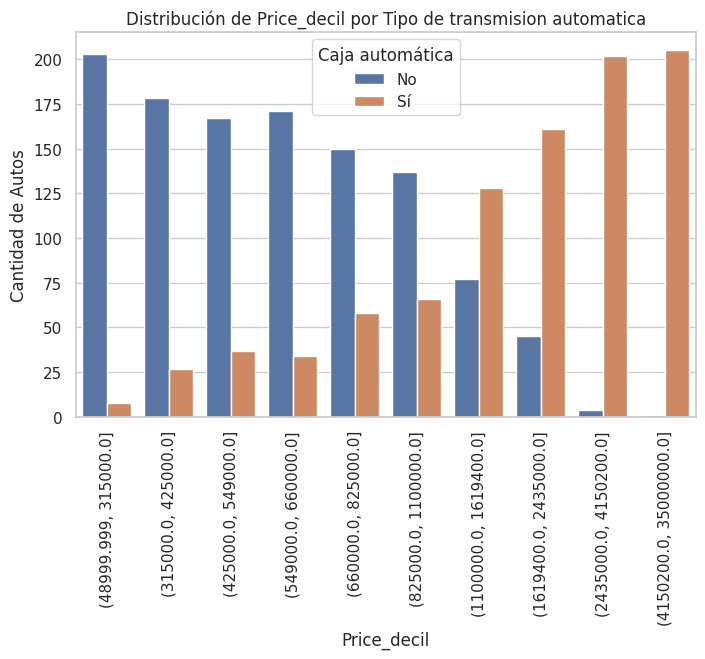

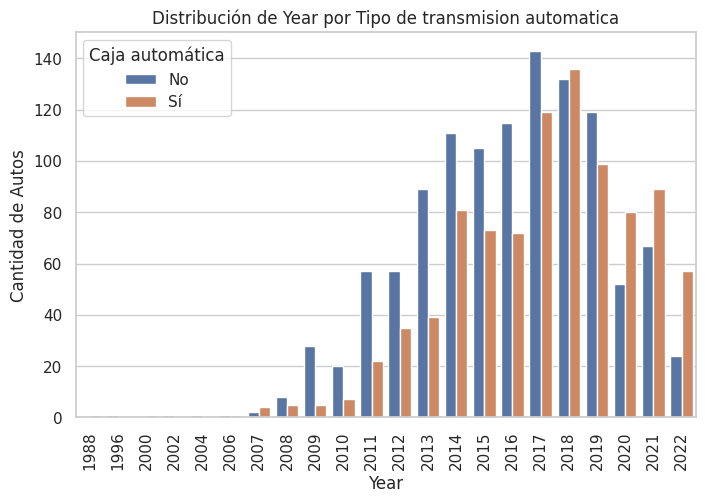

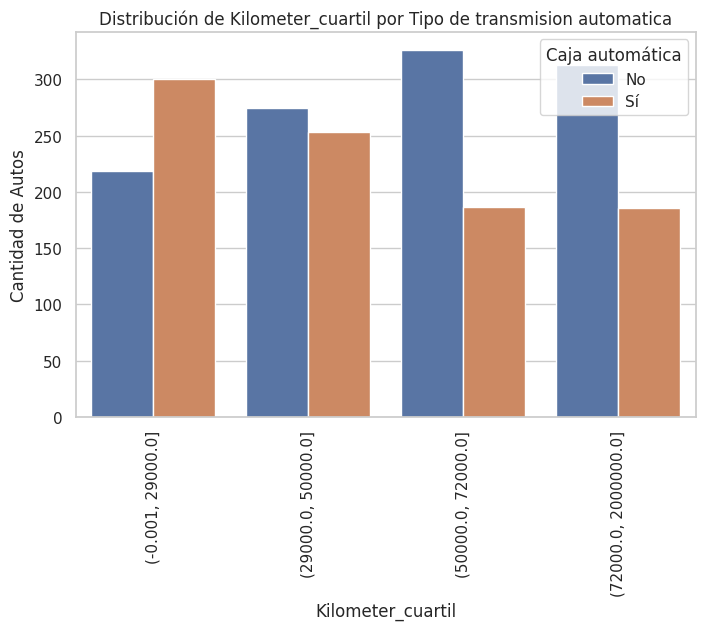

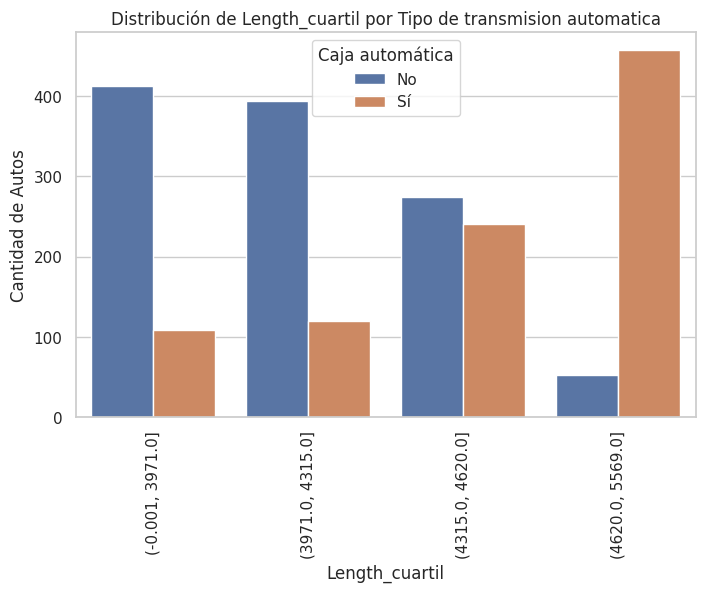

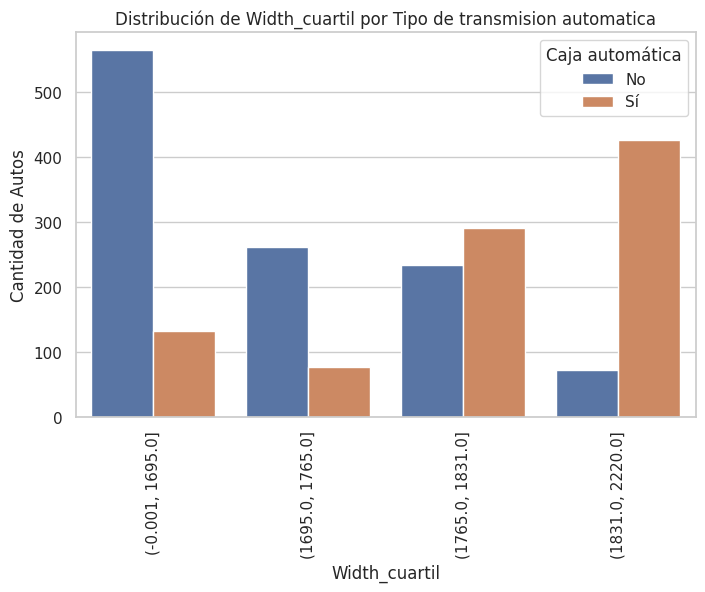

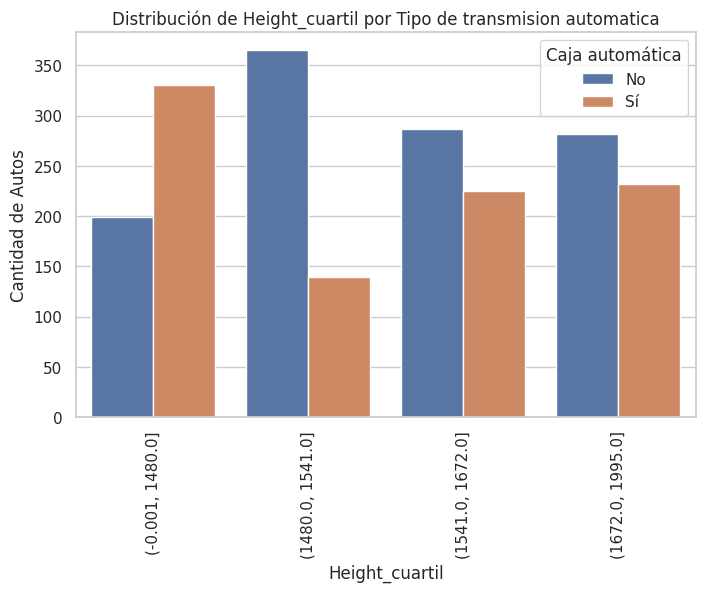

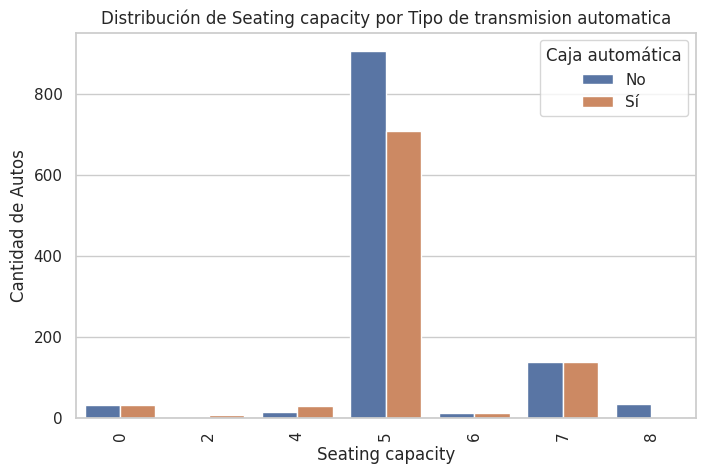

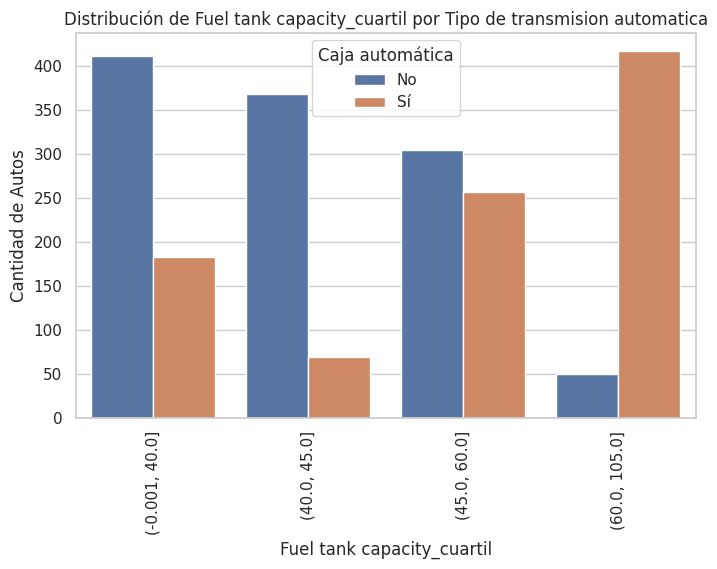

In [ ]:
# Countplots para variables categóricas
for col in categorical_features:
    # Ensure the column exists in the DataFrame before plotting
    if col in df.columns:
        plt.figure(figsize=(8, 5))
        sns.countplot(x=col, data=df, hue='Es_automatico')
        plt.title(f'Distribución de {col.capitalize()} por Tipo de transmision automatica')
        plt.xlabel(col.capitalize())
        plt.ylabel('Cantidad de Autos')
        plt.xticks(rotation=90)
        plt.legend(title='Caja automática', labels=['No', 'Sí'])
        plt.show()
    else:
        print(f"Warning: Column '{col}' not found in DataFrame. Skipping plot.")

6.6. Matriz de Correlación (solo para numéricas continuas y Es_Automatico)

In [ ]:
# Incluimos 'Es_automatico' para ver correlaciones con la variable objetivo
corr_features = numerical_continuous + ['Es_automatico']
correlation_matrix = df[corr_features].corr()

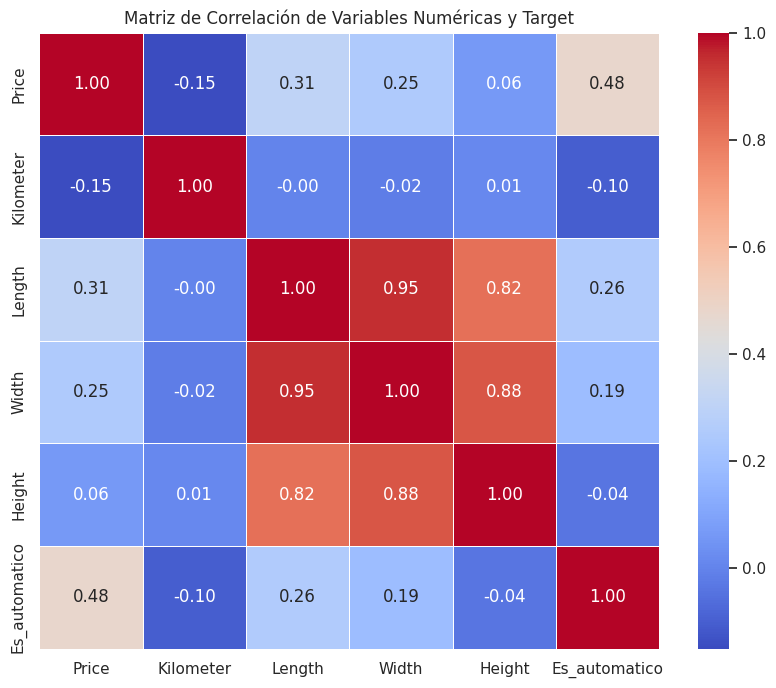

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Variables Numéricas y Target')
plt.show()

In [ ]:
print("Correlaciones con la variable 'Es_automatico':")
correlation_matrix['Es_automatico'].sort_values(ascending=False)

Correlaciones con la variable 'Es_automatico':


,Es_automatico
Es_automatico,1.000000
Price,0.476843
Length,0.255975
Width,0.190018
Height,-0.042289
Kilometer,-0.104907


## 7. Feature Engineering (Ingeniería de Características)

In [ ]:
# Aunque este dataset es bastante completo, podríamos intentar crear alguna característica.
# Ejemplo: Crear grupos por Año del auto.
# Esto odría no mejorar el modelo o incluso empeorarlo.

bins = [0, 1990, 2000, 2010, 2020, df['Year'].max()]
labels = ['"-1990" (<1990)', '"1990-2000" (1990-2000)', '"2000-2010" (2000-2010)', '"2010-2020" (2010-2020)', '"+2020" (>2020)']
df['Year_group'] = pd.cut(df['Year'], bins=bins, labels=labels, right=False)

In [ ]:
df[['Year', 'Year_group']].head()

,Year,Year_group
0,2017,"""2010-2020"" (2010-2020)"
1,2014,"""2010-2020"" (2010-2020)"
2,2011,"""2010-2020"" (2010-2020)"
3,2019,"""2010-2020"" (2010-2020)"
4,2018,"""2010-2020"" (2010-2020)"


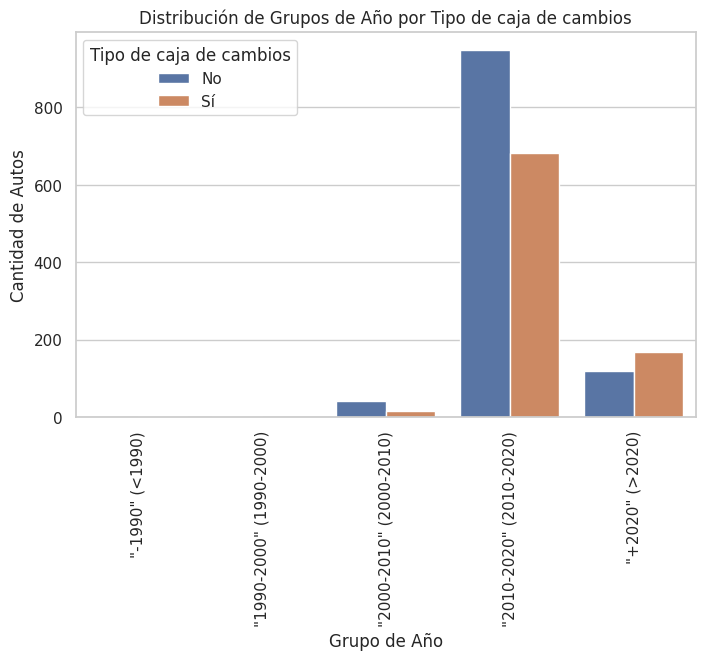

In [ ]:
# Visualizar la nueva característica vs Es_automatico
plt.figure(figsize=(8, 5))
sns.countplot(x='Year_group', data=df, hue='Es_automatico')
plt.title('Distribución de Grupos de Año por Tipo de caja de cambios')
plt.xlabel('Grupo de Año')
plt.ylabel('Cantidad de Autos')
plt.xticks(rotation=90)
plt.legend(title='Tipo de caja de cambios', labels=['No', 'Sí'])
plt.show()

In [ ]:
# Para este ejemplo, vamos a mantener 'Year' y también 'Year_group' para ver qué pasa,
# Para eso debemos tratar 'Year_group' como categórica.

# Actualizamos la lista de características categóricas a codificar
categorical_features_for_encoding = categorical_features + ['Year_group']
# Lista de características numéricas (las originales continuas)
numerical_features_for_scaling = numerical_continuous

In [ ]:
# Lista completa de características a usar (excluyendo 'Transmission')
features = numerical_features_for_scaling + categorical_features_for_encoding
Es_automatico = 'Es_automatico'

print(f"\nCaracterísticas numéricas a escalar: {numerical_features_for_scaling}")
print(f"Características categóricas a codificar (OneHot): {categorical_features_for_encoding}")
print(f"Variable objetivo: {Es_automatico}")
print("\n")


Características numéricas a escalar: ['Price', 'Kilometer', 'Length', 'Width', 'Height']
Características categóricas a codificar (OneHot): ['Price_decil', 'Year', 'Kilometer_cuartil', 'Length_cuartil', 'Width_cuartil', 'Height_cuartil', 'Seating Capacity', 'Fuel Tank Capacity_cuartil', 'Year_group']
Variable objetivo: Es_automatico




## 8. Preprocesamiento de Datos

In [ ]:
# Definir las características (X) y la variable objetivo (y)
X = df[features]
y = df[Es_automatico]

In [ ]:
# Crear el preprocesador usando ColumnTransformer

# StandardScaler para las variables numéricas continuas.
# OneHotEncoder para las variables categóricas (incluida la nueva 'Year_group')
# handle_unknown='ignore' es útil si aparecen valores en test que no estaban en train.


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features_for_scaling),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_for_encoding)
    ],
    remainder='passthrough'
)

In [ ]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num', StandardScaler(),
                                 ['Price', 'Kilometer', 'Length', 'Width',
                                  'Height']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['Price_decil', 'Year', 'Kilometer_cuartil',
                                  'Length_cuartil', 'Width_cuartil',
                                  'Height_cuartil', 'Seating Capacity',
                                  'Fuel Tank Capacity_cuartil',
                                  'Year_group'])])

## 9. División de Datos (Train/Test Split)

In [ ]:
# Dividir los datos ANTES de aplicar el preprocesamiento
# Usamos stratify=y para mantener la proporción de clases en ambos conjuntos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [ ]:
print(f"Tamaño del conjunto de entrenamiento (X_train): {X_train.shape}")
print(f"Tamaño del conjunto de prueba (X_test): {X_test.shape}")
print(f"Tamaño del conjunto de entrenamiento (y_train): {y_train.shape}")
print(f"Tamaño del conjunto de prueba (y_test): {y_test.shape}")

Tamaño del conjunto de entrenamiento (X_train): (1544, 14)
Tamaño del conjunto de prueba (X_test): (515, 14)
Tamaño del conjunto de entrenamiento (y_train): (1544,)
Tamaño del conjunto de prueba (y_test): (515,)


In [ ]:
print("\nDistribución de la variable objetivo en Train vs Test:")
print(f"Train: \n{y_train.value_counts(normalize=True)}")
print(f"Test: \n{y_test.value_counts(normalize=True)}")


Distribución de la variable objetivo en Train vs Test:
Train: 
Es_automatico
0    0.550518
1    0.449482
Name: proportion, dtype: float64
Test: 
Es_automatico
0    0.549515
1    0.450485
Name: proportion, dtype: float64


## 10. Construcción y Entrenamiento del Modelo (Random Forest)

In [ ]:
# Crear el pipeline: incluye el preprocesador y el clasificador
# Esto asegura que el preprocesamiento se ajuste ("fit") en los datos de entrenamiento
# y luego se aplique ("transform") tanto a los datos de entrenamiento como a los de prueba.
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'))
])

In [ ]:
# Entrenar el pipeline completo (preprocesamiento + modelo)
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Price', 'Kilometer',
                                                   'Length', 'Width',
                                                   'Height']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Price_decil', 'Year',
                                                   'Kilometer_cuartil',
                                                   'Length_cuartil',
                                                   'Width_cuartil',
                                                   'Height_cuartil',
                                                   'Seating Capacity',
                                                   'Fuel Tank Capacity_cuartil',
                                                   'Year_group'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

## 11. Evaluación del Modelo

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = model_pipeline.predict(X_test)
y_pred_proba = model_pipeline.predict_proba(X_test)[:, 1] # Probabilidades para la clase positiva (1)

### 11.1. Accuracy

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"--- Accuracy Score ---")
print(f"Accuracy en el conjunto de prueba: {accuracy:.4f}")

--- Accuracy Score ---
Accuracy en el conjunto de prueba: 0.8505


### 11.2 Matriz de confusión


--- Matriz de Confusión ---


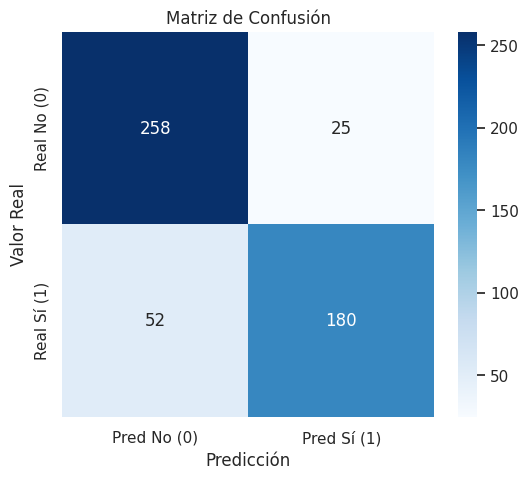

Verdaderos Negativos (TN): 258
Falsos Positivos (FP): 25
Falsos Negativos (FN): 52
Verdaderos Positivos (TP): 180


In [ ]:
print("\n--- Matriz de Confusión ---")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred No (0)', 'Pred Sí (1)'], yticklabels=['Real No (0)', 'Real Sí (1)'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()
print(f"Verdaderos Negativos (TN): {cm[0,0]}")
print(f"Falsos Positivos (FP): {cm[0,1]}")
print(f"Falsos Negativos (FN): {cm[1,0]}")
print(f"Verdaderos Positivos (TP): {cm[1,1]}")

### 11.3. Reporte de Clasificación (Precisión, Recall, F1-Score)

In [ ]:
target_names = ['Manual (0)', 'Automatico (1)']
print(classification_report(y_test, y_pred, target_names=target_names))

                precision    recall  f1-score   support

    Manual (0)       0.83      0.91      0.87       283
Automatico (1)       0.88      0.78      0.82       232

      accuracy                           0.85       515
     macro avg       0.86      0.84      0.85       515
  weighted avg       0.85      0.85      0.85       515



### 11.4. Curva ROC y AUC

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

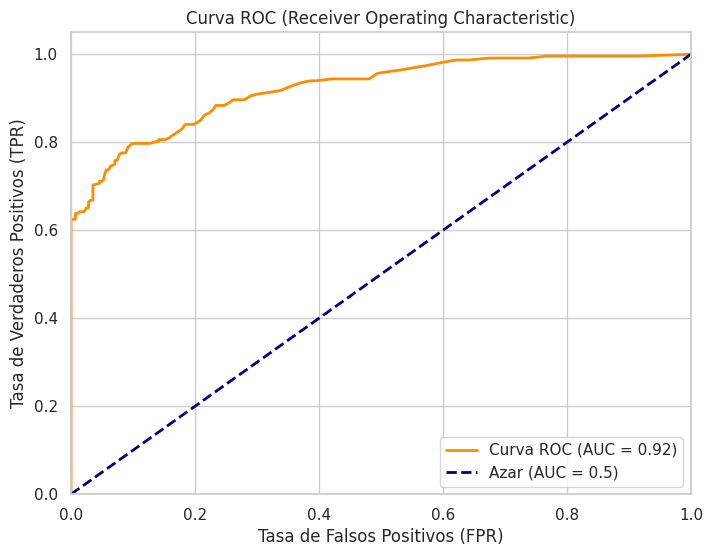

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Azar (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC (Receiver Operating Characteristic)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
print(f"Área Bajo la Curva ROC (AUC): {roc_auc:.4f}")

Área Bajo la Curva ROC (AUC): 0.9222


## 12. Análisis de Importancia de Características

In [ ]:
# Para obtener la importancia, necesitamos acceder al clasificador DENTRO del pipeline
rf_classifier = model_pipeline.named_steps['classifier']
importances = rf_classifier.feature_importances_

In [ ]:
# Obtener el transformador OneHotEncoder del preprocesador
ohe_transformer = model_pipeline.named_steps['preprocessor'].transformers_[1][1]
# Obtener las categorías de las características codificadas
ohe_categories = ohe_transformer.categories_

In [ ]:
ohe_categories

[array([Interval(48999.999, 315000.0, closed='right'),
        Interval(315000.0, 425000.0, closed='right'),
        Interval(425000.0, 549000.0, closed='right'),
        Interval(549000.0, 660000.0, closed='right'),
        Interval(660000.0, 825000.0, closed='right'),
        Interval(825000.0, 1100000.0, closed='right'),
        Interval(1100000.0, 1619400.0, closed='right'),
        Interval(1619400.0, 2435000.0, closed='right'),
        Interval(2435000.0, 4150200.0, closed='right'),
        Interval(4150200.0, 35000000.0, closed='right')], dtype=object),
 array([1988, 1996, 2000, 2002, 2004, 2006, 2007, 2008, 2009, 2010, 2011,
        2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]),
 array([Interval(-0.001, 29000.0, closed='right'),
        Interval(29000.0, 50000.0, closed='right'),
        Interval(50000.0, 72000.0, closed='right'),
        Interval(72000.0, 2000000.0, closed='right')], dtype=object),
 array([Interval(-0.001, 3971.0, closed='right'),
        

In [ ]:
ohe_feature_names = []
for i, col in enumerate(categorical_features_for_encoding):
    for category in ohe_categories[i]:
        ohe_feature_names.append(f"{col}_{category}")

In [ ]:
ohe_feature_names

['Price_decil_(48999.999, 315000.0]',
 'Price_decil_(315000.0, 425000.0]',
 'Price_decil_(425000.0, 549000.0]',
 'Price_decil_(549000.0, 660000.0]',
 'Price_decil_(660000.0, 825000.0]',
 'Price_decil_(825000.0, 1100000.0]',
 'Price_decil_(1100000.0, 1619400.0]',
 'Price_decil_(1619400.0, 2435000.0]',
 'Price_decil_(2435000.0, 4150200.0]',
 'Price_decil_(4150200.0, 35000000.0]',
 'Year_1988',
 'Year_1996',
 'Year_2000',
 'Year_2002',
 'Year_2004',
 'Year_2006',
 'Year_2007',
 'Year_2008',
 'Year_2009',
 'Year_2010',
 'Year_2011',
 'Year_2012',
 'Year_2013',
 'Year_2014',
 'Year_2015',
 'Year_2016',
 'Year_2017',
 'Year_2018',
 'Year_2019',
 'Year_2020',
 'Year_2021',
 'Year_2022',
 'Kilometer_cuartil_(-0.001, 29000.0]',
 'Kilometer_cuartil_(29000.0, 50000.0]',
 'Kilometer_cuartil_(50000.0, 72000.0]',
 'Kilometer_cuartil_(72000.0, 2000000.0]',
 'Length_cuartil_(-0.001, 3971.0]',
 'Length_cuartil_(3971.0, 4315.0]',
 'Length_cuartil_(4315.0, 4620.0]',
 'Length_cuartil_(4620.0, 5569.0]',
 '

In [ ]:
# Combinar nombres de características numéricas y categóricas codificadas
# El orden debe coincidir con cómo ColumnTransformer junta las columnas
final_feature_names = numerical_features_for_scaling + ohe_feature_names

Importancia de las características según Random Forest:
                                     Feature  Importance
0                                      Price    0.214623
3                                      Width    0.089531
2                                     Length    0.082840
1                                  Kilometer    0.075165
4                                     Height    0.061678
63  Fuel Tank Capacity_cuartil_(60.0, 105.0]    0.047690
44           Length_cuartil_(4620.0, 5569.0]    0.038417
13        Price_decil_(2435000.0, 4150200.0]    0.021225
5          Price_decil_(48999.999, 315000.0]    0.018659
61   Fuel Tank Capacity_cuartil_(40.0, 45.0]    0.017094
14       Price_decil_(4150200.0, 35000000.0]    0.015632
42           Length_cuartil_(3971.0, 4315.0]    0.013796
45            Width_cuartil_(-0.001, 1695.0]    0.013588
49           Height_cuartil_(-0.001, 1480.0]    0.012881
48            Width_cuartil_(1831.0, 2220.0]    0.012448


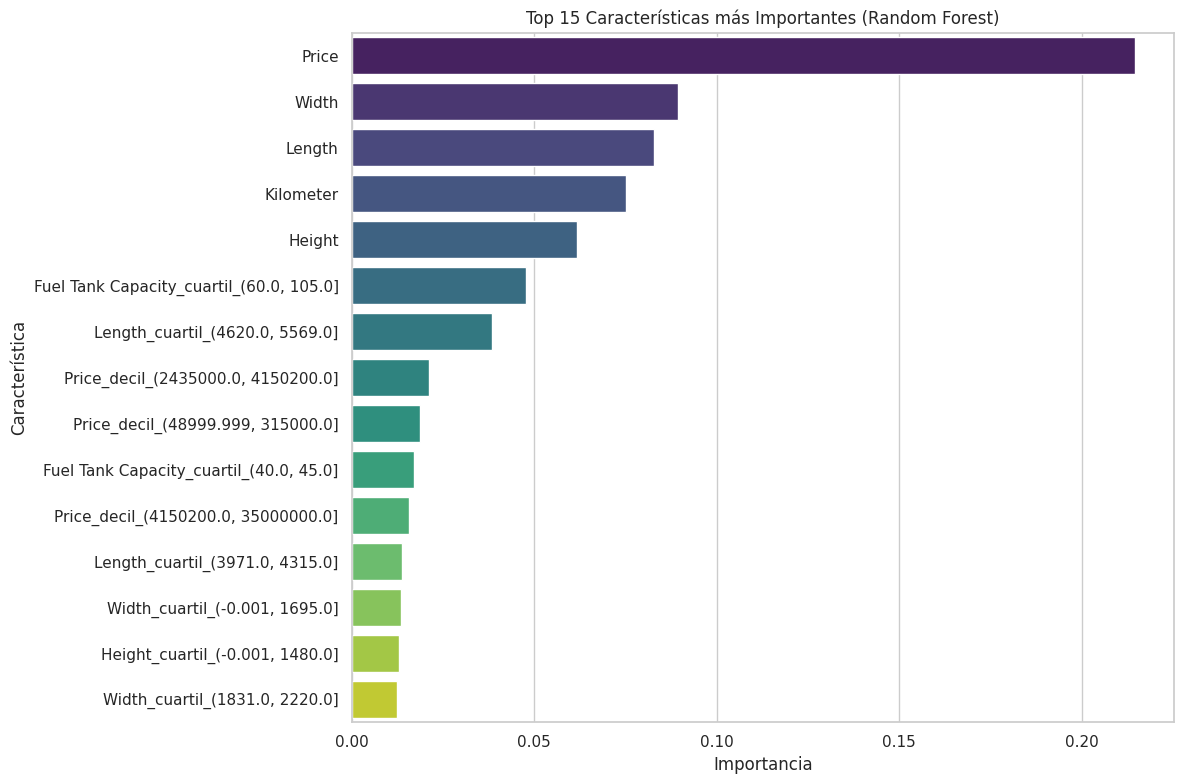

In [ ]:
# Crear un DataFrame para visualizar la importancia
if len(importances) == len(final_feature_names):
    feature_importance_df = pd.DataFrame({'Feature': final_feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    print("Importancia de las características según Random Forest:")
    print(feature_importance_df.head(15)) # Mostrar las 15 más importantes

    # Graficar la importancia de las características
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15), palette='viridis', hue='Feature')
    plt.title('Top 15 Características más Importantes (Random Forest)')
    plt.xlabel('Importancia')
    plt.ylabel('Característica')
    plt.tight_layout()
    plt.show()

## 13. Conclusiones

In [ ]:
print("Resumen de Resultados:")
print(f"- Accuracy del modelo en el conjunto de prueba: {accuracy:.4f}")
print(f"- AUC del modelo en el conjunto de prueba: {roc_auc:.4f}")
print("- El reporte de clasificación muestra buena Precisión, Recall y F1-Score para ambas clases (0 y 1).")

Resumen de Resultados:
- Accuracy del modelo en el conjunto de prueba: 0.8505
- AUC del modelo en el conjunto de prueba: 0.9222
- El reporte de clasificación muestra buena Precisión, Recall y F1-Score para ambas clases (0 y 1).


**Validación de la Hipótesis:**

La hipótesis alternativa (H1) planteaba que era posible predecir presencia de caja automatica con una precisión > 70% y un AUC > 0.5 usando las características dadas y un Random Forest.

In [ ]:
print(f"Obtuvimos una Accuracy de {accuracy:.2f} y un AUC de {roc_auc:.2f}.")

if accuracy > 0.75 and roc_auc > 0.5:
    print("RESULTADO: La hipótesis alternativa (H1) es soportada por los resultados. El modelo supera el umbral de precisión y es significativamente mejor que el azar.")
    print("Rechazamos la hipótesis nula (H0).")
else:
    print("RESULTADO: La hipótesis alternativa (H1) no es completamente soportada. Aunque el AUC indica un rendimiento mejor que el azar, la precisión podría no haber alcanzado el umbral deseado del 75% (o viceversa).")
    print("Se necesita revisar el modelo o los datos.")

Obtuvimos una Accuracy de 0.85 y un AUC de 0.92.
RESULTADO: La hipótesis alternativa (H1) es soportada por los resultados. El modelo supera el umbral de precisión y es significativamente mejor que el azar.
Rechazamos la hipótesis nula (H0).


Respecto a las preguntas que  me realicé en un inicio llegue a las siguentes conclusiones:
1) Inesperadamente los autos mas largos y anchos, es más probable que tenga caja automática.

2) Los autos con caja automática son más livianos.

3) Como así también los autos más nuevos, fabricados desde el 2020, vs. los más antiguos.

4) Además, los autos con precio mayor a 1100000 son más probables a tener caja automática que los menores a dicho precio.

5) Por otra parte, noté que los autos con mayor capacidad de litros de combustible, tienen más probabilidad de ser automáticos también.